In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfs = []
csvs = ['sigmoid_no_Cape.csv', 'L1_loss_MC.csv', 'cape_bin_sum.csv']
titles = ['sigmoid no Cape', 'MC', 'cape bin equal sum', 'no cape new', 'only cape new', '0e_1th_1f', '0e_3th_1f', '0e_7th_1f', '50e_1th_0f', '50e_3th_0f', '50e_7th_0f', '50e_1th_1f', '50e_3th_1f', '50e_7th_1f']
csvs_new = ['no_cape_new.csv', 'only_cape_new.csv', '0+80_1th_1f.csv', '0+80_3th_1f.csv', '0+80_7th_1f.csv', '50+80_1th_0f.csv', '50+80_3th_0f.csv', '50+80_7th_0f.csv', '50+80_1th_1f.csv', '50+80_3th_1f.csv', '50+80_7th_1f.csv']
dfs_new = []
for _ in range(len(csvs_new)):
	dfs_new.append(pd.DataFrame())
dfs = []
for _ in range(len(csvs)):
	dfs.append(pd.DataFrame())
numTot = len(csvs + csvs_new)

for i in range(len(dfs)):
	dfs[i] = pd.read_csv(csvs[i])
for i in range(len(dfs_new)):
	dfs_new[i] = pd.read_csv(csvs_new[i])

In [3]:
brier_scores = []
ECE = []
KL = []
thresholds = [1,5,10,20,50,100,150]
for i in range(len(csvs)):
    brier_scores.append(pd.DataFrame(columns=["mm", "brierScore"]))
    ECE.append(pd.DataFrame(columns=["mm", "ECE"]))
    KL.append(pd.DataFrame(columns=["mm", "KL"]))
    for th in thresholds:
        for d in dfs[i][f"Brier score {th} mm"].to_list():
            brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
        for d in dfs[i][f"ECE {th} mm"].to_list():
            ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
        for d in dfs[i][f"KL {th} mm"].to_list():
            KL[i] = pd.concat([KL[i], pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

for i in range(len(csvs_new)):
    brier_scores.append(pd.DataFrame(columns=["mm", "brierScore"]))
    ECE.append(pd.DataFrame(columns=["mm", "ECE"]))
    KL.append(pd.DataFrame(columns=["mm", "KL"]))
    for th in thresholds:
        for d in dfs_new[i][f"test_metric/brierScore {th}"].to_list():
            brier_scores[i+len(csvs)] = pd.concat([brier_scores[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
        for d in dfs_new[i][f"test_metric/ECE {th}"].to_list():
            ECE[i+len(csvs)] = pd.concat([ECE[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
        for d in dfs_new[i][f"test_metric/KL {th}"].to_list():
            KL[i+len(csvs)] = pd.concat([KL[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_72741/762540848.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_72741/762540848.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
/var/folders/30/xm8738cn5b3

sigmoid no Cape: 0.15610005179415803

MC: 0.0675960882484739

cape bin equal sum: 0.15274788088171254

no cape new: 0.05891818684770147

only cape new: 0.059497465765622023

0e_1th_1f: 0.1384489080972141

0e_3th_1f: 0.0914944697309423

0e_7th_1f: 0.05961496697094271

50e_1th_0f: 0.1334431659844186

50e_3th_0f: 0.09329050717254476

50e_7th_0f: 0.059407183980261964

50e_1th_1f: 0.13546647628148392

50e_3th_1f: 0.09490716540151169

50e_7th_1f: 0.05888051848360991



Text(0.5, 1.0, 'BRIER SCORE')

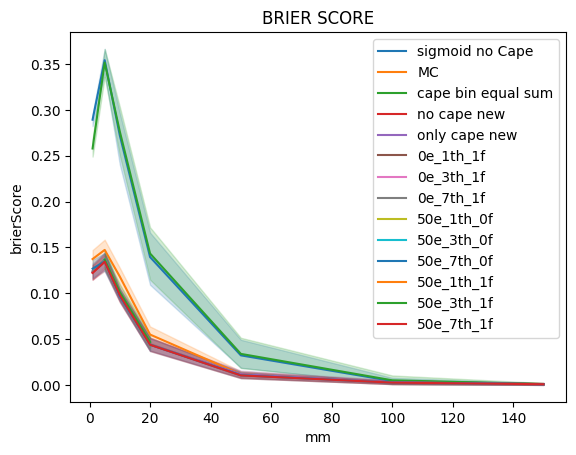

In [4]:
for i in range(numTot):
	sns.lineplot(data=brier_scores[i], x="mm", y="brierScore", label=titles[i])
	print(f"{titles[i]}: {np.mean(brier_scores[i]["brierScore"])}\n")
plt.legend()
plt.title("BRIER SCORE")

sigmoid no Cape: 0.03263192623937038

MC: 0.08546107475427255

cape bin equal sum: 0.01680621396378001

no cape new: 0.026441277862151075

only cape new: 0.028377187419201574

0e_1th_1f: 0.055672826793201874

0e_3th_1f: 0.031345259319492134

0e_7th_1f: 0.02856799778370219

50e_1th_0f: 0.04238610139129984

50e_3th_0f: 0.03804861286051079

50e_7th_0f: 0.026199997763810042

50e_1th_1f: 0.04394867993005944

50e_3th_1f: 0.03920859408755096

50e_7th_1f: 0.025816481843775194



Text(0.5, 1.0, 'ECE')

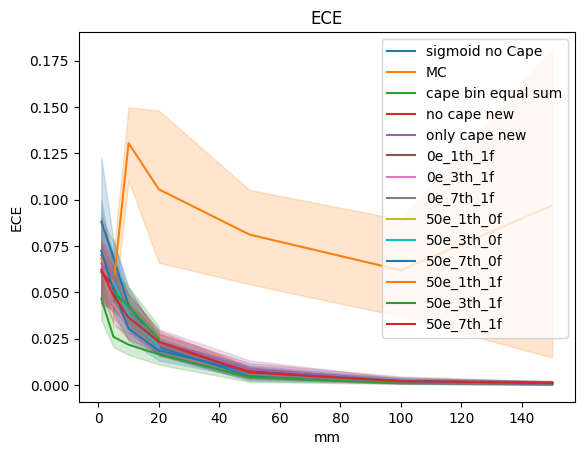

In [5]:
for i in range(numTot):
	sns.lineplot(data=ECE[i], x="mm", y="ECE", label=titles[i])
	print(f"{titles[i]}: {np.mean(ECE[i]['ECE'])}\n")
plt.legend()
plt.title("ECE")

sigmoid no Cape: 2.4850215265219697

MC: 2.2759972042930756

cape bin equal sum: 2.4105685241520405

no cape new: 2.3903031253315037

only cape new: 2.496536821221179

0e_1th_1f: 5.591603385077582

0e_3th_1f: 3.6813340981801352

0e_7th_1f: 2.4629161940510604

50e_1th_0f: 5.467182477315267

50e_3th_0f: 3.644062905399888

50e_7th_0f: 2.470162587981331

50e_1th_1f: 5.396881686316596

50e_3th_1f: 3.6228033745730364

50e_7th_1f: 2.4457747702069197



Text(0.5, 1.0, 'KL')

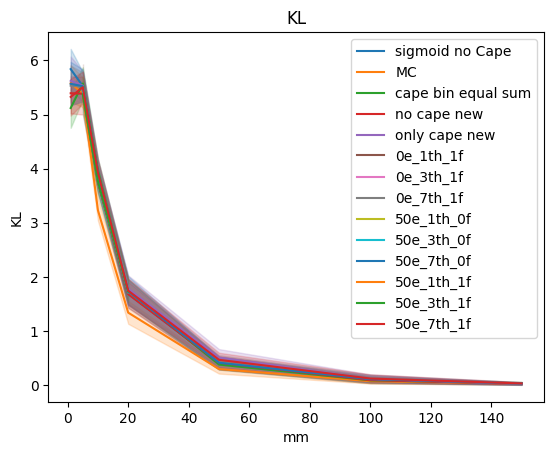

In [6]:
for i in range(numTot):
	sns.lineplot(data=KL[i], x="mm", y="KL", label=titles[i])
	print(f"{titles[i]}: {np.mean(KL[i]['KL'])}\n")
plt.legend()
plt.title("KL")